In [5]:
import numpy as np
from datetime import date
np.random.seed(0)
import glob
from PARSER_MSD import ensemble_sqavg,getnparray ,getrunparams, time_msd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

# Defining the ions and lattice class

In [6]:
class ion:
    def __init__(self,i:int,pos:tuple):
        self.i=i        #assign an index to the ion
        self.pos=pos    #pos (y,x) of the ion in the space (which will be later mapped on the lattice)
        self.init=pos   #init position of ion in space 



class lat_2d:

    def __init__(self,N:int,coverage:float,epsilon:float):
        if coverage>1:
            print("Coverage Cannot be greater than 1")
            raise ValueError
        self.N=N
        self.epsilon=epsilon
        self.cov=coverage
        self.ions=list()        

    def get_lattice_2d(self):
        A=np.array([(i,j) for i in range(self.N) for j in range(self.N)])
        B=np.arange(0,self.N**2)
        ionc=list()                                                             #contains the intial position of all the occupying lattice ions
        choice=np.random.choice(B,int(self.cov*self.N*self.N),replace=False)
        lattice=np.zeros((self.N,self.N))
        for b in choice:
            lattice[ tuple(A[b]) ]=1 
            ionc.append(tuple(A[b]))    
        return (lattice, ionc)

    def get_energy_2d(self,sites):
        print(sites)
        A=np.array([(i,j) for i in range(self.N) for j in range(self.N)])
        B=np.arange(0,self.N**2)
        ionc=list()                                                             #contains the intial position of all the occupying lattice ions
        choice=np.random.choice(B,int(sites))#self.cov*self.N*self.N
        lattice=np.zeros((self.N,self.N))
        for b in choice:
            lattice[ tuple(A[b]) ]+=self.epsilon 
        
        return lattice

    def init_lattice(self):
        self.lattice,self.ionpos=self.get_lattice_2d()
        for i,posn in enumerate(self.ionpos):
            self.ions.append(ion(i,posn))
    
    def init_energylattice(self):
        
        self.enlattice=self.get_energy_2d(2*(100-self.cov*100)*(self.N**2)/100)
        
    def mappostolat(self,s,i:int):
        """
        Args:
        s(2-D numpy vector): the random next step (coordination number 4)
        Returns:
        i(int): index of the ion lattice ion
        2-tuple of indices for the mapped position of ion onto the lattice if that step is taken
        """
        if s is None:
            s=np.array((0,0))
        nextstep=np.array(self.ions[i].pos)+s
        return tuple(nextstep%self.N)
        

    def oneionstep(self,i):
        
        MOVES=[(1,0),(0,1),(-1,0),(0,-1)]
        s=np.array(MOVES[np.random.choice([0,1,2,3])]) # s is an array but class.pos is a tuple, so we add them by converting pos into ndarray and then revert it back to tuple
       # print("U: ",s, i)
        
        
        latposn=self.mappostolat(s,i)
        delU=self.enlattice[latposn]-self.enlattice[self.mappostolat(None,i)]
        """TODO Apply the energy lattice condition """
        rnd=np.random.uniform(0,1)
        prob=np.exp(-delU)
        if self.lattice[latposn]!=1 and prob>rnd: #if there is no ion in the step chosen
            self.lattice[self.mappostolat(None,i)]=0 #vacate teh current position in the lattice   
            self.ions[i].pos=tuple(np.array(self.ions[i].pos)+s) #update the ion position
            self.lattice[latposn]=1 #update the new filled position
        return None

    def onemcstep(self):
        if len(self.ions)!=0:
            [self.oneionstep(i) for i in range(len(self.ions))]
        else:
            self.init_lattice()
            self.onemcstep()
      
    def sqdisp(self):
        disp=np.zeros_like(self.ions)
        for i,io in enumerate(self.ions):
            disp[i]=np.linalg.norm((np.array(io.pos)-np.array(io.init)))**2
            #print("posn: ",(np.array(io.pos)-np.array(io.init)),":",np.linalg.norm((np.array(io.pos)-np.array(io.init))))
        return disp



# Simulation Parameters

In [7]:
write=0
N=20
NSTEPS=15000
WT=100
today=date.today()
coverage=[30]#[100-2*i for i in range(,30,10)]
epsilon=2223/1300
equilibriation=5000
paramlen=7


# Visualising Ion Movement

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib



plt.rcParams["font.family"] = "serif"
cov=30

mylat=lat_2d(N,cov/100,epsilon)
mylat.init_lattice()
mylat.init_energylattice()
cMap = ListedColormap(['white', 'black'])
fig, axs = plt.subplots(1, 2)
cmap = plt.cm.get_cmap('gray', 8) 
#axs[0].pColor(mylat.lattice,cmap='gray')
img=axs[0].imshow(mylat.lattice,interpolation='nearest', origin='lower',
                    cmap=cMap)

for i,step in enumerate(range(100)):            
    mylat.onemcstep()
        #fig.title()

im=axs[1].imshow(mylat.lattice,interpolation='nearest', origin='lower',
                    cmap=cMap)

axs[0].set_title(f't=0 MC Step')
axs[1].set_title(f't=100 MC Step')

#fig.colorbar(cMap)

cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.5, pad=0.04)
cbar.set_ticks([0.25,.75])#np.arange(0,1,0.25))
cbar.set_ticklabels(['Empty','Occupied'])

fig.suptitle('Attendance Matrix',y=0.80,x=0.45)
fig.savefig(f'Attendance-evolution-cov{cov}.png.png',bbox_inches='tight')
plt.show()

Using matplotlib backend: <object object at 0x00000253763C0D10>


NameError: name 'lat_2d' is not defined

## _Enegy map_

In [17]:
%matplotlib notebook

In [8]:
%matplotlib notebook
import glob
from PARSER_MSD import ensemble_sqavg,getnparray ,getrunparams, time_msd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
width = 0.35
paramlen=7
equilibriation=50000
Ns=100000
wp=100
steps=np.arange(0*100,(Ns//4),wp) 

"""
    MSDS_=dict()
    WP=0
    NSTEPS=0
    D=list()
"""

#plt.savefig('Simrun-3\\DvsCov.png',bbox_inches='tight')
#plt.plot(MSDS_[10],label=f"Coverage:{10}",marker='o',linestyle=None)


'\n    MSDS_=dict()\n    WP=0\n    NSTEPS=0\n    D=list()\n'

# Plotting Visualisations for different coverages

##  Dataset-3 

In [9]:

NSTEPS=150000 
wp=100 

#epsilon:1.71 
EQUILIBIRIATION=50000
Ns=NSTEPS-EQUILIBIRIATION
steps=np.arange(0*100,(Ns//4),wp) 


250
_______________________
84 
 simdata\Simrun-3\Coverage-84-NSTEPS150000-September-10-2022.txt
250
_______________________
86 
 simdata\Simrun-3\Coverage-86-NSTEPS150000-September-10-2022.txt
250
_______________________
88 
 simdata\Simrun-3\Coverage-88-NSTEPS150000-September-10-2022.txt
250
_______________________
90 
 simdata\Simrun-3\Coverage-90-NSTEPS150000-September-10-2022.txt
250
_______________________
92 
 simdata\Simrun-3\Coverage-92-NSTEPS150000-September-10-2022.txt
250
_______________________
94 
 simdata\Simrun-3\Coverage-94-NSTEPS150000-September-10-2022.txt
250
_______________________
96 
 simdata\Simrun-3\Coverage-96-NSTEPS150000-September-10-2022.txt
250
_______________________
98 
 simdata\Simrun-3\Coverage-98-NSTEPS150000-September-10-2022.txt


<IPython.core.display.Javascript object>


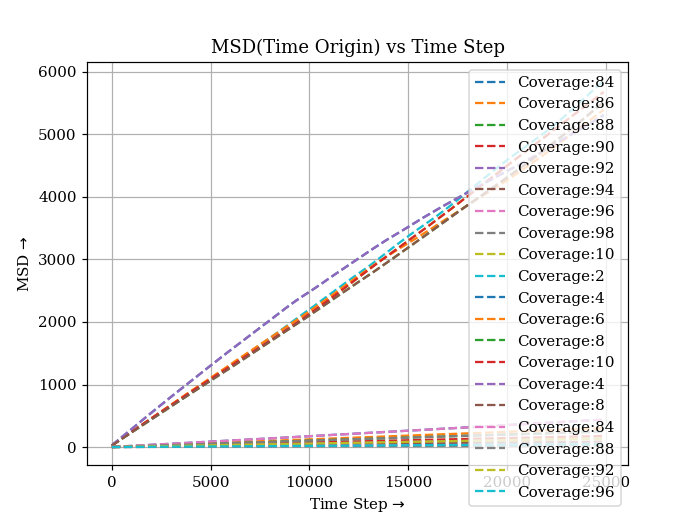

In [10]:
MSDS_=dict()
for i,dire in enumerate(sorted(glob.glob('simdata\\Simrun-3'))):
    names=glob.glob(f'{dire}\\*.txt')#COVERAGE-*-NSTEPS*-*
    #print(i,'\n',names)
    for fname in names:
        params=getrunparams(fname,paramlen)
        narray=getnparray(fname,params,paramlen)
        MSDS_[int(float(params['Coverage'].split()[0]))]=np.array(time_msd(narray,fname,paramlen, EQUILIBIRIATION))
        
        
for key,value in MSDS_.items():
    plt.plot(steps,value,label=f'Coverage:{key}'.split()[0],linestyle='--')
plt.xlabel(r'Time Step $\to$')
plt.title('MSD(Time Origin) vs Time Step')
plt.ylabel(r'MSD $\to$')
plt.legend()
plt.grid()
plt.show()
MSDS3=MSDS_

## DATASET-4

In [32]:

NSTEPS=150000 
wp=100 

#epsilon:1.71 
EQUILIBIRIATION=50000
Ns=NSTEPS-EQUILIBIRIATION
steps=np.arange(0*100,(Ns//4),wp) 


250
_______________________
10 
 simdata\Simrun-4\Coverage-10-NSTEPS150000-September-13-2022.txt
250
_______________________
2 
 simdata\Simrun-4\Coverage-2-NSTEPS150000-September-13-2022.txt
250
_______________________
4 
 simdata\Simrun-4\Coverage-4-NSTEPS150000-September-13-2022.txt
250
_______________________
6 
 simdata\Simrun-4\Coverage-6-NSTEPS150000-September-13-2022.txt
250
_______________________
8 
 simdata\Simrun-4\Coverage-8-NSTEPS150000-September-13-2022.txt


<IPython.core.display.Javascript object>


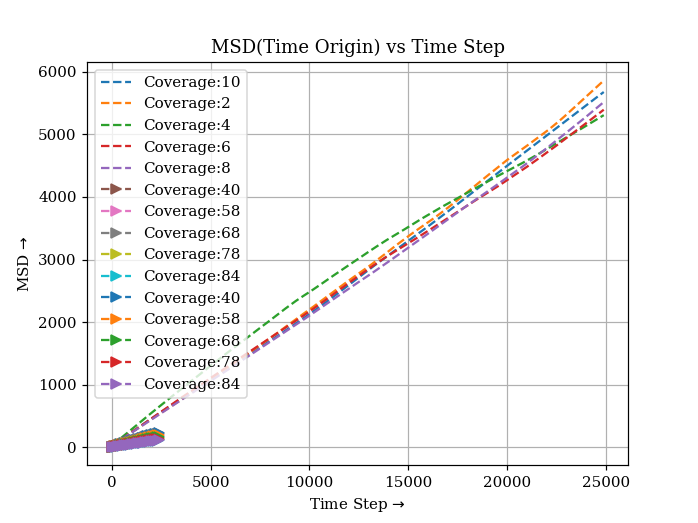

In [33]:
MSDS_=dict()
for i,dire in enumerate(sorted(glob.glob('simdata\\Simrun-4'))):
    names=glob.glob(f'{dire}\\*.txt')#COVERAGE-*-NSTEPS*-*
    #print(i,'\n',names)
    for fname in names:
       # print(fname)
        params=getrunparams(fname,paramlen)
        narray=getnparray(fname,params,paramlen)
        MSDS_[int(float(params['Coverage'].split()[0]))]=np.array(time_msd(narray,fname,paramlen,EQUILIBIRIATION))

for key,value in MSDS_.items():
    #print(key)
    plt.plot(steps,value,label=f'Coverage:{key}'.split()[0],linestyle='--')
plt.xlabel(r'Time Step $\to$')
plt.title('MSD(Time Origin) vs Time Step')
plt.ylabel(r'MSD $\to$')
plt.legend()
plt.grid()
plt.show()
MSDS4=MSDS_

In [21]:

steps[-1]

24900

In [22]:
Ns//4

25000

In [19]:
for i,(key,value) in enumerate(MSDS4.items()):
    print(key)
    if i%2==0: plt.plot(steps,value,label=f'Coverage:{key}'.split()[0],linestyle='--')

        
for i,(key,value) in enumerate(MSDS3.items()):
    print(key)
    if i%2==0: plt.plot(steps,value,label=f'Coverage:{key}'.split()[0],linestyle='--')

    
plt.xlabel(r'Time Step $\to$')
plt.title('MSD(Time Origin) vs Time Step')
plt.ylabel(r'MSD $\to$')
plt.legend()
plt.grid()
plt.show()

10
2
4
6
8
84
86
88
90
92
94
96
98


In [36]:
write=0
N=20
NSTEPS=15000
WT=100
today=date.today()
coverage=[30]#[100-2*i for i in range(,30,10)]
epsilon=2223/1300
width = 0.35
paramlen=7
equilibriation=5000
Ns=10000
wp=100
steps=np.arange(0*100,(Ns//4),wp) 

In [39]:

coverage=[ 40, 58, 68, 78, 84]
for cov in coverage:
    day=today.strftime("%B-%d-%Y")
    fname=f"simdata\\Simrun-6\Coverage-{cov}-NSTEPS{NSTEPS}-{day}.txt"
    with open(fname,'w+') as fhand: 
        mylat=lat_2d(N,cov/100,epsilon)
        mylat.init_lattice()
        mylat.init_energylattice()
        NIONS=len(mylat.ions)
        fhand.write(f"Created:{day} \n")
        fhand.write(f"Coverage:{cov} \n")
        fhand.write(f"N:{N} \n")
        fhand.write(f"NUM-IONS:{NIONS} \n")
        fhand.write(f"NSTEPS:{NSTEPS} \n")
        fhand.write(f"WRITE-PERIODICITY:{WT} \n")
        fhand.write(f"epsilon:{epsilon} \n")
        for i,step in enumerate(range(NSTEPS)):
            mylat.onemcstep()
            if i%WT==0 and i>equilibriation:
                for io in mylat.ions:
                    fhand.write(f"{io.pos[0]}  {io.pos[1]} \n")

480.0


KeyboardInterrupt: 

In [37]:

MSDS_=dict()


for i,dire in enumerate(sorted(glob.glob('simdata\\Simrun-6'))):
    names=glob.glob(f'{dire}\\*.txt')#COVERAGE-*-NSTEPS*-*
    #print(i,'\n',names)
    for fname in names:
        print(fname)
        params=getrunparams(fname,paramlen)
        narray=getnparray(fname,params,paramlen)
        MSDS_[int(float(params['Coverage'].split()[0]))]=np.array(time_msd(narray,fname,paramlen))


simdata\Simrun-6\Coverage-40-NSTEPS15000-October-12-2022.txt
25
_______________________
40 
 simdata\Simrun-6\Coverage-40-NSTEPS15000-October-12-2022.txt
simdata\Simrun-6\Coverage-58-NSTEPS15000-October-12-2022.txt
25
_______________________
58 
 simdata\Simrun-6\Coverage-58-NSTEPS15000-October-12-2022.txt
simdata\Simrun-6\Coverage-68-NSTEPS15000-October-12-2022.txt
25
_______________________
68 
 simdata\Simrun-6\Coverage-68-NSTEPS15000-October-12-2022.txt
simdata\Simrun-6\Coverage-78-NSTEPS15000-October-12-2022.txt
25
_______________________
78 
 simdata\Simrun-6\Coverage-78-NSTEPS15000-October-12-2022.txt
simdata\Simrun-6\Coverage-84-NSTEPS15000-October-12-2022.txt
25
_______________________
84 
 simdata\Simrun-6\Coverage-84-NSTEPS15000-October-12-2022.txt


array([ 10.63424745,  20.20399485,  29.45872396,  38.98203947,
        48.52493351,  57.90645161,  67.2810462 ,  76.60776099,
        85.63666667,  94.45      , 103.3102983 , 112.12471264,
       120.94273256, 129.73426471, 138.42046131, 147.35519578,
       156.42865854, 165.33371914, 174.50203125, 183.59042722,
       192.85064103, 202.07199675, 211.21644737, 220.59125   ,
       229.84315878])

In [40]:

for key,value in MSDS_.items():
    print(key)
    plt.plot(steps,value,label=f'Coverage:{key}'.split()[0],linestyle='--',marker='>')


plt.xlabel(r'Time Step $\to$')
plt.title('MSD(Time Origin) vs Time Step')
plt.ylabel(r'MSD $\to$')
plt.legend()
plt.grid()
plt.show()

40
58
68
78
84
